In [19]:
# @title data_fetch
# Enhanced TSMOM Data Fetcher with Easy Configuration
# Modular design for easy period setting and data customization

import yfinance as yf
import pandas as pd
import numpy as np
import warnings
from datetime import datetime, timedelta
import time
import json
from typing import Dict, List, Optional, Tuple, Union
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

class TSMOMConfig:
    """Configuration class for TSMOM data fetching"""

    def __init__(self):
        self.reset_to_default()

    def reset_to_default(self):
        """Reset to default configuration"""
        # Asset universe configuration
        self.asset_universe = {
            # COMMODITIES (Energy)
            'CL=F': {'name': 'Crude_Oil', 'class': 'Commodities', 'active': True},
            'NG=F': {'name': 'Natural_Gas', 'class': 'Commodities', 'active': True},
            'RB=F': {'name': 'Gasoline', 'class': 'Commodities', 'active': True},
            'HO=F': {'name': 'Heating_Oil', 'class': 'Commodities', 'active': True},

            # COMMODITIES (Metals)
            'GC=F': {'name': 'Gold', 'class': 'Commodities', 'active': True},
            'SI=F': {'name': 'Silver', 'class': 'Commodities', 'active': True},
            'HG=F': {'name': 'Copper', 'class': 'Commodities', 'active': True},
            'PL=F': {'name': 'Platinum', 'class': 'Commodities', 'active': True},
            'PA=F': {'name': 'Palladium', 'class': 'Commodities', 'active': True},

            # COMMODITIES (Agriculture)
            'ZC=F': {'name': 'Corn', 'class': 'Commodities', 'active': True},
            'ZW=F': {'name': 'Wheat', 'class': 'Commodities', 'active': True},
            'ZS=F': {'name': 'Soybeans', 'class': 'Commodities', 'active': True},
            'ZM=F': {'name': 'Soy_Meal', 'class': 'Commodities', 'active': True},
            'ZL=F': {'name': 'Soy_Oil', 'class': 'Commodities', 'active': True},
            'SB=F': {'name': 'Sugar', 'class': 'Commodities', 'active': True},
            'CC=F': {'name': 'Cocoa', 'class': 'Commodities', 'active': True},
            'KC=F': {'name': 'Coffee', 'class': 'Commodities', 'active': True},
            'CT=F': {'name': 'Cotton', 'class': 'Commodities', 'active': True},
            'HE=F': {'name': 'Lean_Hogs', 'class': 'Commodities', 'active': True},
            'LE=F': {'name': 'Live_Cattle', 'class': 'Commodities', 'active': True},

            # EQUITY INDICES
            '^GSPC': {'name': 'SP500', 'class': 'Equities', 'active': True},
            '^FTSE': {'name': 'FTSE100', 'class': 'Equities', 'active': True},
            '^GDAXI': {'name': 'DAX', 'class': 'Equities', 'active': True},
            '^FCHI': {'name': 'CAC40', 'class': 'Equities', 'active': True},
            '^N225': {'name': 'Nikkei225', 'class': 'Equities', 'active': True},
            '^AEX': {'name': 'AEX', 'class': 'Equities', 'active': True},
            '^IBEX': {'name': 'IBEX35', 'class': 'Equities', 'active': True},

            # CURRENCIES
            'EURUSD=X': {'name': 'EUR_USD', 'class': 'Currencies', 'active': True},
            'GBPUSD=X': {'name': 'GBP_USD', 'class': 'Currencies', 'active': True},
            'USDJPY=X': {'name': 'USD_JPY', 'class': 'Currencies', 'active': True},
            'USDCAD=X': {'name': 'USD_CAD', 'class': 'Currencies', 'active': True},
            'AUDUSD=X': {'name': 'AUD_USD', 'class': 'Currencies', 'active': True},
            'NZDUSD=X': {'name': 'NZD_USD', 'class': 'Currencies', 'active': True},
            'USDCHF=X': {'name': 'USD_CHF', 'class': 'Currencies', 'active': True},
            'EURGBP=X': {'name': 'EUR_GBP', 'class': 'Currencies', 'active': True},
            'EURJPY=X': {'name': 'EUR_JPY', 'class': 'Currencies', 'active': True},
            'AUDJPY=X': {'name': 'AUD_JPY', 'class': 'Currencies', 'active': True},

            # GOVERNMENT BONDS (Yields)
            '^TNX': {'name': 'US_10Y_Yield', 'class': 'Fixed_Income', 'active': True},
            '^TYX': {'name': 'US_30Y_Yield', 'class': 'Fixed_Income', 'active': True},
            '^FVX': {'name': 'US_5Y_Yield', 'class': 'Fixed_Income', 'active': True},
            '^IRX': {'name': 'US_3M_Yield', 'class': 'Fixed_Income', 'active': True},

            # BOND FUTURES
            'ZB=F': {'name': 'US_30Y_Bond', 'class': 'Fixed_Income', 'active': True},
            'ZN=F': {'name': 'US_10Y_Note', 'class': 'Fixed_Income', 'active': True},
            'ZF=F': {'name': 'US_5Y_Note', 'class': 'Fixed_Income', 'active': True},
            'ZT=F': {'name': 'US_2Y_Note', 'class': 'Fixed_Income', 'active': True},
        }

        # Time period settings
        self.time_periods = {
            'default': {'start': '2015-01-01', 'end': None},
            'short_term': {'start': '2020-01-01', 'end': None},
            'medium_term': {'start': '2018-01-01', 'end': None},
            'long_term': {'start': '2010-01-01', 'end': None},
            'post_covid': {'start': '2020-03-01', 'end': None},
            'custom': {'start': '2015-01-01', 'end': None}
        }

        # Data quality settings
        self.data_quality = {
            'min_data_points': 300,
            'min_completeness': 0.8,
            'max_missing_threshold': 0.5,
            'forward_fill': True,
            'drop_insufficient': True
        }

        # Fetching settings
        self.fetch_settings = {
            'rate_limit_delay': 0.05,
            'retry_attempts': 3,
            'timeout': 30,
            'benchmark_ticker': '^GSPC',
            'risk_free_ticker': '^IRX'
        }

    def set_time_period(self, period_name: str = None, start_date: str = None, end_date: str = None):
        """Set time period for data fetching"""
        if period_name and period_name in self.time_periods:
            if start_date:
                self.time_periods[period_name]['start'] = start_date
            if end_date:
                self.time_periods[period_name]['end'] = end_date
        elif start_date:
            # Set custom period
            self.time_periods['custom']['start'] = start_date
            self.time_periods['custom']['end'] = end_date

    def get_time_period(self, period_name: str = 'default') -> Dict[str, str]:
        """Get time period settings"""
        if period_name not in self.time_periods:
            period_name = 'default'

        period = self.time_periods[period_name].copy()
        if period['end'] is None:
            period['end'] = datetime.now().strftime('%Y-%m-%d')

        return period

    def activate_assets(self, asset_names: List[str] = None, asset_classes: List[str] = None,
                       tickers: List[str] = None):
        """Activate specific assets"""
        if asset_names:
            for ticker, info in self.asset_universe.items():
                info['active'] = info['name'] in asset_names
        elif asset_classes:
            for ticker, info in self.asset_universe.items():
                info['active'] = info['class'] in asset_classes
        elif tickers:
            for ticker, info in self.asset_universe.items():
                info['active'] = ticker in tickers

    def deactivate_assets(self, asset_names: List[str] = None, asset_classes: List[str] = None,
                         tickers: List[str] = None):
        """Deactivate specific assets"""
        if asset_names:
            for ticker, info in self.asset_universe.items():
                if info['name'] in asset_names:
                    info['active'] = False
        elif asset_classes:
            for ticker, info in self.asset_universe.items():
                if info['class'] in asset_classes:
                    info['active'] = False
        elif tickers:
            for ticker, info in self.asset_universe.items():
                if ticker in tickers:
                    info['active'] = False

    def get_active_assets(self) -> Dict[str, Dict]:
        """Get currently active assets"""
        return {ticker: info for ticker, info in self.asset_universe.items()
                if info['active']}

    def get_asset_classes(self) -> List[str]:
        """Get available asset classes"""
        return list(set(info['class'] for info in self.asset_universe.values()))

    def save_config(self, filename: str = 'tsmom_config.json'):
        """Save configuration to file"""
        config_data = {
            'asset_universe': self.asset_universe,
            'time_periods': self.time_periods,
            'data_quality': self.data_quality,
            'fetch_settings': self.fetch_settings
        }
        with open(filename, 'w') as f:
            json.dump(config_data, f, indent=2)
        print(f"💾 Configuration saved to {filename}")

    def load_config(self, filename: str = 'tsmom_config.json'):
        """Load configuration from file"""
        try:
            with open(filename, 'r') as f:
                config_data = json.load(f)

            self.asset_universe = config_data.get('asset_universe', self.asset_universe)
            self.time_periods = config_data.get('time_periods', self.time_periods)
            self.data_quality = config_data.get('data_quality', self.data_quality)
            self.fetch_settings = config_data.get('fetch_settings', self.fetch_settings)

            print(f"📂 Configuration loaded from {filename}")
        except Exception as e:
            print(f"❌ Failed to load config: {str(e)}")

    def print_summary(self):
        """Print configuration summary"""
        active_assets = self.get_active_assets()
        asset_classes = {}
        for info in active_assets.values():
            asset_class = info['class']
            asset_classes[asset_class] = asset_classes.get(asset_class, 0) + 1

        print("📋 TSMOM Configuration Summary")
        print("=" * 50)
        print(f"🎯 Active Assets: {len(active_assets)}")
        print(f"📊 Asset Classes:")
        for asset_class, count in asset_classes.items():
            print(f"  - {asset_class}: {count} assets")
        print(f"📅 Available Periods: {', '.join(self.time_periods.keys())}")
        print(f"🔍 Min Data Points: {self.data_quality['min_data_points']}")
        print(f"📈 Min Completeness: {self.data_quality['min_completeness']:.1%}")


class EnhancedTSMOMFetcher:
    """Enhanced TSMOM Data Fetcher with easy configuration"""

    def __init__(self, config: TSMOMConfig = None):
        self.config = config if config else TSMOMConfig()
        self.last_fetch_metadata = None

    def _flatten_columns(self, data):
        """Flatten MultiIndex columns if present"""
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)
        return data

    def _find_price_column(self, data):
        """Find the best price column to use"""
        data = self._flatten_columns(data)
        priority_columns = ['Adj Close', 'Close', 'Price', 'Last']

        for col in priority_columns:
            if col in data.columns:
                return col, data[col]

        numeric_cols = data.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            return numeric_cols[0], data[numeric_cols[0]]

        return None, None

    def _fetch_single_asset(self, ticker: str, asset_info: Dict, start_date: str,
                           end_date: str) -> Tuple[Optional[pd.Series], str]:
        """Fetch data for a single asset with robust error handling"""
        try:
            data = yf.download(ticker, start=start_date, end=end_date, progress=False)

            if data.empty:
                return None, f"Empty dataset for {ticker}"

            price_col_name, price_series = self._find_price_column(data)

            if price_series is None:
                return None, f"No price column found for {ticker}"

            price_series = price_series.dropna()
            min_points = self.config.data_quality['min_data_points']

            if len(price_series) < min_points:
                return None, f"Insufficient data: {len(price_series)} < {min_points}"

            return price_series, f"Success using '{price_col_name}'"

        except Exception as e:
            return None, f"Error: {str(e)}"

    def fetch_data(self, period_name: str = 'default',
                   start_date: str = None, end_date: str = None) -> Tuple[pd.DataFrame, Dict]:
        """
        Fetch data with enhanced configuration support

        Parameters:
        -----------
        period_name : str
            Name of predefined period or 'custom'
        start_date : str, optional
            Custom start date (overrides period_name)
        end_date : str, optional
            Custom end date (overrides period_name)

        Returns:
        --------
        tuple : (prices_df, metadata)
        """
        # Determine time period
        if start_date or end_date:
            self.config.set_time_period('custom', start_date, end_date)
            period = self.config.get_time_period('custom')
        else:
            period = self.config.get_time_period(period_name)

        start_date = period['start']
        end_date = period['end']

        print(f"🔄 Fetching TSMOM data from {start_date} to {end_date}")
        print(f"📊 Period: {period_name}")

        active_assets = self.config.get_active_assets()
        print(f"🎯 Assets to fetch: {len(active_assets)}")
        print("=" * 60)

        successful_data = {}
        failed_assets = {}

        for i, (ticker, asset_info) in enumerate(active_assets.items(), 1):
            asset_name = asset_info['name']
            asset_class = asset_info['class']

            print(f"[{i:2d}/{len(active_assets)}] {asset_name:15s} ({ticker:10s}) [{asset_class:12s}]", end=" ")

            price_series, status = self._fetch_single_asset(ticker, asset_info, start_date, end_date)

            if price_series is not None:
                successful_data[asset_name] = price_series
                print(f"✅ {status}")
            else:
                failed_assets[asset_name] = status
                print(f"❌ {status}")

            time.sleep(self.config.fetch_settings['rate_limit_delay'])

        if not successful_data:
            raise ValueError("No data was successfully fetched!")

        # Create consolidated dataset
        print(f"\n📊 Creating consolidated dataset...")
        prices_df = pd.DataFrame(successful_data).sort_index()

        # Data cleaning based on config
        if self.config.data_quality['forward_fill']:
            prices_df = prices_df.ffill()

        # Remove rows with too many missing values
        threshold = len(prices_df.columns) * self.config.data_quality['max_missing_threshold']
        prices_df = prices_df.dropna(thresh=threshold)

        # Remove assets with insufficient completeness
        min_completeness = self.config.data_quality['min_completeness']
        asset_completeness = prices_df.count() / len(prices_df)
        valid_assets = asset_completeness[asset_completeness >= min_completeness].index
        prices_df = prices_df[valid_assets]

        # Generate metadata
        asset_class_counts = {}
        for asset in prices_df.columns:
            for ticker, info in active_assets.items():
                if info['name'] == asset:
                    asset_class = info['class']
                    asset_class_counts[asset_class] = asset_class_counts.get(asset_class, 0) + 1
                    break

        metadata = {
            'period_name': period_name,
            'date_range': (start_date, end_date),
            'actual_date_range': (prices_df.index[0], prices_df.index[-1]),
            'successful_assets': list(successful_data.keys()),
            'failed_assets': failed_assets,
            'asset_class_counts': asset_class_counts,
            'total_observations': len(prices_df),
            'success_rate': len(successful_data) / len(active_assets),
            'data_completeness': asset_completeness.to_dict()
        }

        self.last_fetch_metadata = metadata

        # Print summary
        print(f"✅ Dataset created successfully!")
        print(f"📅 Date range: {prices_df.index[0].strftime('%Y-%m-%d')} to {prices_df.index[-1].strftime('%Y-%m-%d')}")
        print(f"📊 Final shape: {prices_df.shape}")
        print(f"🎯 Success rate: {len(successful_data)}/{len(active_assets)} ({metadata['success_rate']:.1%})")
        print(f"\n📋 Asset class breakdown:")
        for asset_class, count in asset_class_counts.items():
            print(f"  {asset_class}: {count} assets")

        return prices_df, metadata

    def fetch_benchmark(self, period_name: str = 'default',
                       start_date: str = None, end_date: str = None) -> Optional[pd.Series]:
        """Fetch benchmark data (S&P 500)"""
        if start_date or end_date:
            period = {'start': start_date or '2015-01-01',
                     'end': end_date or datetime.now().strftime('%Y-%m-%d')}
        else:
            period = self.config.get_time_period(period_name)

        print("📈 Fetching S&P 500 benchmark...")
        ticker = self.config.fetch_settings['benchmark_ticker']

        price_series, status = self._fetch_single_asset(
            ticker, {'name': 'SP500', 'class': 'Benchmark'},
            period['start'], period['end']
        )

        if price_series is not None:
            print(f"✅ Benchmark: {status}")
            return price_series
        else:
            print(f"❌ Benchmark failed: {status}")
            return None

    def fetch_risk_free_rate(self, period_name: str = 'default',
                            start_date: str = None, end_date: str = None) -> Optional[pd.Series]:
        """Fetch risk-free rate data"""
        if start_date or end_date:
            period = {'start': start_date or '2015-01-01',
                     'end': end_date or datetime.now().strftime('%Y-%m-%d')}
        else:
            period = self.config.get_time_period(period_name)

        print("🏛️ Fetching risk-free rate (3M Treasury)...")
        ticker = self.config.fetch_settings['risk_free_ticker']

        rate_series, status = self._fetch_single_asset(
            ticker, {'name': '3M_Treasury', 'class': 'RiskFree'},
            period['start'], period['end']
        )

        if rate_series is not None:
            rate_series = rate_series / 100  # Convert percentage to decimal
            print(f"✅ Risk-free rate: {status}")
            print(f"📊 Average rate: {rate_series.mean():.2%}")
            return rate_series
        else:
            print(f"❌ Risk-free rate failed: {status}")
            return None

    def plot_data_overview(self, prices_df: pd.DataFrame, save_path: str = None):
        """Plot data overview with English labels"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('TSMOM Data Overview', fontsize=16, fontweight='bold')

        # Asset class distribution
        if self.last_fetch_metadata:
            asset_classes = self.last_fetch_metadata['asset_class_counts']
            axes[0, 0].pie(asset_classes.values(), labels=asset_classes.keys(), autopct='%1.1f%%')
            axes[0, 0].set_title('Asset Class Distribution')

        # Data completeness
        completeness = prices_df.count() / len(prices_df)
        completeness.plot(kind='bar', ax=axes[0, 1])
        axes[0, 1].set_title('Data Completeness by Asset')
        axes[0, 1].set_ylabel('Completeness Ratio')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # Price evolution (normalized)
        normalized_prices = prices_df / prices_df.iloc[0]
        sample_assets = normalized_prices.columns[:5]  # Plot first 5 assets
        normalized_prices[sample_assets].plot(ax=axes[1, 0])
        axes[1, 0].set_title('Normalized Price Evolution (Sample Assets)')
        axes[1, 0].set_ylabel('Normalized Price')
        axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # Returns distribution
        returns = prices_df.pct_change().dropna()
        returns.mean().plot(kind='bar', ax=axes[1, 1])
        axes[1, 1].set_title('Average Daily Returns by Asset')
        axes[1, 1].set_ylabel('Daily Return')
        axes[1, 1].tick_params(axis='x', rotation=45)

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"📊 Plot saved to {save_path}")

        plt.show()

    def save_data(self, prices_df: pd.DataFrame, filename: str = None):
        """Save data with auto-generated filename"""
        if filename is None:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = f'tsmom_data_{timestamp}.csv'

        try:
            prices_df.to_csv(filename)
            print(f"💾 Data saved to {filename}")

            # Save metadata
            if self.last_fetch_metadata:
                metadata_file = filename.replace('.csv', '_metadata.json')
                with open(metadata_file, 'w') as f:
                    # Convert datetime objects to strings for JSON serialization
                    metadata = self.last_fetch_metadata.copy()
                    if 'actual_date_range' in metadata:
                        metadata['actual_date_range'] = [
                            metadata['actual_date_range'][0].strftime('%Y-%m-%d'),
                            metadata['actual_date_range'][1].strftime('%Y-%m-%d')
                        ]
                    json.dump(metadata, f, indent=2)
                print(f"📋 Metadata saved to {metadata_file}")

        except Exception as e:
            print(f"❌ Save failed: {str(e)}")

    def load_data(self, filename: str) -> pd.DataFrame:
        """Load data from CSV"""
        try:
            prices_df = pd.read_csv(filename, index_col=0, parse_dates=True)
            print(f"📂 Data loaded from {filename}")
            print(f"📊 Shape: {prices_df.shape}")

            # Try to load metadata
            metadata_file = filename.replace('.csv', '_metadata.json')
            try:
                with open(metadata_file, 'r') as f:
                    self.last_fetch_metadata = json.load(f)
                print(f"📋 Metadata loaded from {metadata_file}")
            except:
                print("⚠️ Metadata file not found")

            return prices_df
        except Exception as e:
            print(f"❌ Load failed: {str(e)}")
            return None


# Convenience functions for easy usage
def create_quick_config(asset_classes: List[str] = None,
                       period: str = 'default',
                       start_date: str = None,
                       end_date: str = None) -> TSMOMConfig:
    """Create a quick configuration"""
    config = TSMOMConfig()

    if asset_classes:
        config.activate_assets(asset_classes=asset_classes)

    if start_date or end_date:
        config.set_time_period('custom', start_date, end_date)

    return config

def quick_fetch(asset_classes: List[str] = None,
               period: str = 'default',
               start_date: str = None,
               end_date: str = None,
               plot_overview: bool = True) -> Tuple[pd.DataFrame, Dict]:
    """Quick data fetch with minimal configuration"""

    config = create_quick_config(asset_classes, period, start_date, end_date)
    fetcher = EnhancedTSMOMFetcher(config)

    prices_df, metadata = fetcher.fetch_data(period, start_date, end_date)

    if plot_overview:
        fetcher.plot_data_overview(prices_df)

    return prices_df, metadata

# Interactive Configuration Interface
class InteractiveTSMOMSetup:
    """Interactive setup for TSMOM data fetching"""

    def __init__(self):
        self.config = TSMOMConfig()

    def run_interactive_setup(self) -> Tuple[pd.DataFrame, Dict]:
        """Run complete interactive setup"""
        print("🎯 Interactive TSMOM Data Setup")
        print("=" * 50)

        # Step 1: Choose setup mode
        self._choose_setup_mode()

        # Step 2: Configure time period
        self._configure_time_period()

        # Step 3: Configure assets
        self._configure_assets()

        # Step 4: Configure data quality
        self._configure_data_quality()

        # Step 5: Review and confirm
        self._review_configuration()

        # Step 6: Fetch data
        return self._fetch_data()

    def _choose_setup_mode(self):
        """Choose between quick setup or detailed setup"""
        print("\n📋 Choose setup mode:")
        print("1. Quick Setup (recommended)")
        print("2. Detailed Setup")
        print("3. Load existing configuration")

        while True:
            choice = input("\nEnter your choice (1-3): ").strip()
            if choice == '1':
                self.setup_mode = 'quick'
                break
            elif choice == '2':
                self.setup_mode = 'detailed'
                break
            elif choice == '3':
                self._load_existing_config()
                self.setup_mode = 'loaded'
                break
            else:
                print("❌ Invalid choice. Please enter 1, 2, or 3.")

    def _load_existing_config(self):
        """Load existing configuration"""
        filename = input("Enter configuration filename (or press Enter for default): ").strip()
        if not filename:
            filename = 'tsmom_config.json'

        try:
            self.config.load_config(filename)
            print(f"✅ Configuration loaded from {filename}")
        except:
            print(f"❌ Could not load {filename}. Using default configuration.")

    def _configure_time_period(self):
        """Configure time period interactively"""
        if self.setup_mode == 'loaded':
            return

        print("\n📅 Configure Time Period:")
        print("Available periods:")
        periods = list(self.config.time_periods.keys())
        for i, period in enumerate(periods, 1):
            period_info = self.config.time_periods[period]
            print(f"{i}. {period}: {period_info['start']} to {period_info['end'] or 'present'}")

        print(f"{len(periods) + 1}. Custom period")

        while True:
            try:
                choice = int(input(f"\nSelect period (1-{len(periods) + 1}): "))
                if 1 <= choice <= len(periods):
                    self.selected_period = periods[choice - 1]
                    break
                elif choice == len(periods) + 1:
                    self._configure_custom_period()
                    break
                else:
                    print(f"❌ Please enter a number between 1 and {len(periods) + 1}")
            except ValueError:
                print("❌ Please enter a valid number")

    def _configure_custom_period(self):
        """Configure custom time period"""
        print("\n🗓️ Custom Period Setup:")

        while True:
            start_date = input("Enter start date (YYYY-MM-DD): ").strip()
            try:
                datetime.strptime(start_date, '%Y-%m-%d')
                break
            except ValueError:
                print("❌ Invalid date format. Please use YYYY-MM-DD")

        while True:
            end_date = input("Enter end date (YYYY-MM-DD, or press Enter for today): ").strip()
            if not end_date:
                end_date = None
                break
            try:
                datetime.strptime(end_date, '%Y-%m-%d')
                break
            except ValueError:
                print("❌ Invalid date format. Please use YYYY-MM-DD")

        self.config.set_time_period('custom', start_date, end_date)
        self.selected_period = 'custom'
        print(f"✅ Custom period set: {start_date} to {end_date or 'present'}")

    def _configure_assets(self):
        """Configure assets interactively"""
        if self.setup_mode == 'loaded':
            return

        print("\n🎯 Configure Assets:")
        print("1. Select by Asset Class")
        print("2. Select Individual Assets")
        print("3. Use All Available Assets")

        while True:
            choice = input("\nChoose selection method (1-3): ").strip()
            if choice == '1':
                self._select_by_asset_class()
                break
            elif choice == '2':
                self._select_individual_assets()
                break
            elif choice == '3':
                print("✅ Using all available assets")
                break
            else:
                print("❌ Invalid choice. Please enter 1, 2, or 3.")

    def _select_by_asset_class(self):
        """Select assets by asset class"""
        asset_classes = self.config.get_asset_classes()

        print("\n📊 Available Asset Classes:")
        for i, asset_class in enumerate(asset_classes, 1):
            # Count assets in each class
            count = sum(1 for info in self.config.asset_universe.values()
                       if info['class'] == asset_class)
            print(f"{i}. {asset_class} ({count} assets)")

        selected_classes = []
        print("\nSelect asset classes (enter numbers separated by commas, or 'all' for all):")

        while True:
            selection = input("Your selection: ").strip().lower()

            if selection == 'all':
                selected_classes = asset_classes
                break

            try:
                indices = [int(x.strip()) for x in selection.split(',')]
                if all(1 <= i <= len(asset_classes) for i in indices):
                    selected_classes = [asset_classes[i-1] for i in indices]
                    break
                else:
                    print(f"❌ Please enter numbers between 1 and {len(asset_classes)}")
            except ValueError:
                print("❌ Please enter valid numbers separated by commas")

        # Deactivate all, then activate selected
        for info in self.config.asset_universe.values():
            info['active'] = False

        self.config.activate_assets(asset_classes=selected_classes)

        print(f"✅ Selected asset classes: {', '.join(selected_classes)}")

        # Show assets that will be included
        active_assets = self.config.get_active_assets()
        print(f"📈 Total assets selected: {len(active_assets)}")

    def _select_individual_assets(self):
        """Select individual assets"""
        print("\n📋 Available Assets:")

        # Group by asset class for better display
        by_class = {}
        for ticker, info in self.config.asset_universe.items():
            asset_class = info['class']
            if asset_class not in by_class:
                by_class[asset_class] = []
            by_class[asset_class].append((ticker, info['name']))

        asset_list = []
        counter = 1
        for asset_class, assets in by_class.items():
            print(f"\n{asset_class}:")
            for ticker, name in assets:
                print(f"  {counter:2d}. {name} ({ticker})")
                asset_list.append((ticker, name))
                counter += 1

        print(f"\nSelect assets (enter numbers separated by commas):")
        print(f"Available range: 1-{len(asset_list)}")

        while True:
            try:
                selection = input("Your selection: ").strip()
                indices = [int(x.strip()) for x in selection.split(',')]

                if all(1 <= i <= len(asset_list) for i in indices):
                    selected_tickers = [asset_list[i-1][0] for i in indices]

                    # Deactivate all, then activate selected
                    for info in self.config.asset_universe.values():
                        info['active'] = False

                    self.config.activate_assets(tickers=selected_tickers)

                    selected_names = [asset_list[i-1][1] for i in indices]
                    print(f"✅ Selected assets: {', '.join(selected_names)}")
                    break
                else:
                    print(f"❌ Please enter numbers between 1 and {len(asset_list)}")
            except ValueError:
                print("❌ Please enter valid numbers separated by commas")

    def _configure_data_quality(self):
        """Configure data quality settings"""
        if self.setup_mode == 'quick':
            return

        print("\n🔍 Configure Data Quality (current values in parentheses):")

        # Minimum data points
        current_min = self.config.data_quality['min_data_points']
        new_min = input(f"Minimum data points ({current_min}): ").strip()
        if new_min:
            try:
                self.config.data_quality['min_data_points'] = int(new_min)
                print(f"✅ Minimum data points set to {new_min}")
            except ValueError:
                print("❌ Invalid number, keeping current value")

        # Minimum completeness
        current_comp = self.config.data_quality['min_completeness']
        new_comp = input(f"Minimum completeness 0-1 ({current_comp}): ").strip()
        if new_comp:
            try:
                value = float(new_comp)
                if 0 <= value <= 1:
                    self.config.data_quality['min_completeness'] = value
                    print(f"✅ Minimum completeness set to {value}")
                else:
                    print("❌ Value must be between 0 and 1, keeping current value")
            except ValueError:
                print("❌ Invalid number, keeping current value")

    def _review_configuration(self):
        """Review configuration before fetching"""
        print("\n📋 Configuration Review:")
        print("=" * 40)

        # Time period
        if hasattr(self, 'selected_period'):
            period_info = self.config.get_time_period(self.selected_period)
            print(f"📅 Period: {self.selected_period}")
            print(f"   From: {period_info['start']}")
            print(f"   To: {period_info['end']}")

        # Active assets
        active_assets = self.config.get_active_assets()
        asset_classes = {}
        for info in active_assets.values():
            asset_class = info['class']
            asset_classes[asset_class] = asset_classes.get(asset_class, 0) + 1

        print(f"\n🎯 Assets: {len(active_assets)} total")
        for asset_class, count in asset_classes.items():
            print(f"   {asset_class}: {count}")

        # Data quality
        print(f"\n🔍 Data Quality:")
        print(f"   Min data points: {self.config.data_quality['min_data_points']}")
        print(f"   Min completeness: {self.config.data_quality['min_completeness']:.1%}")

        # Confirm
        print("\n" + "=" * 40)
        confirm = input("Proceed with data fetching? (y/n): ").strip().lower()

        if confirm != 'y':
            print("❌ Setup cancelled")
            return None

        # Option to save configuration
        save_config = input("Save this configuration? (y/n): ").strip().lower()
        if save_config == 'y':
            filename = input("Configuration filename (or Enter for default): ").strip()
            if not filename:
                filename = f"tsmom_config_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
            self.config.save_config(filename)

    def _fetch_data(self):
        """Fetch data with current configuration"""
        print("\n🚀 Starting data fetch...")

        fetcher = EnhancedTSMOMFetcher(self.config)

        period = getattr(self, 'selected_period', 'default')
        prices_df, metadata = fetcher.fetch_data(period)

        # Ask about visualization
        plot_data = input("\nGenerate data overview plot? (y/n): ").strip().lower()
        if plot_data == 'y':
            fetcher.plot_data_overview(prices_df)

        # Ask about saving
        save_data = input("Save data to file? (y/n): ").strip().lower()
        if save_data == 'y':
            filename = input("Data filename (or Enter for auto-generated): ").strip()
            if filename:
                fetcher.save_data(prices_df, filename)
            else:
                fetcher.save_data(prices_df)

        return prices_df, metadata


# Jupyter Notebook Widget Interface (requires ipywidgets)
class JupyterTSMOMInterface:
    """Interactive Jupyter notebook interface using ipywidgets"""

    def __init__(self):
        self.config = TSMOMConfig()
        self.validated_tickers = {}  # Cache for validated tickers
        self.custom_tickers = []  # Store custom tickers
        self.setup_widgets()

    def setup_widgets(self):
        """Setup interactive widgets"""
        try:
            import ipywidgets as widgets
            from IPython.display import display
        except ImportError:
            print("❌ ipywidgets not installed. Install with: pip install ipywidgets")
            return None

        # Time period widgets
        self.period_dropdown = widgets.Dropdown(
            options=list(self.config.time_periods.keys()),
            value='default',
            description='Period:'
        )

        self.start_date = widgets.DatePicker(
            description='Start Date:',
            value=datetime(2015, 1, 1).date()
        )

        self.end_date = widgets.DatePicker(
            description='End Date:',
            value=datetime.now().date()
        )

        # Asset selection mode
        self.asset_mode = widgets.RadioButtons(
            options=['Asset Classes', 'Custom Tickers'],
            value='Asset Classes',
            description='Selection Mode:',
            style={'description_width': 'initial'}
        )

        # Asset class selection
        asset_classes = self.config.get_asset_classes()
        self.asset_class_select = widgets.SelectMultiple(
            options=asset_classes,
            value=asset_classes,
            description='Asset Classes:',
            rows=len(asset_classes)
        )

        # Custom ticker input
        self.ticker_input = widgets.Textarea(
            value='',
            placeholder='Enter tickers separated by commas (e.g., AAPL, GOOGL, MSFT, BTC-USD, GC=F, ^GSPC)',
            description='Tickers:',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='100%', height='80px')
        )

        # Ticker validation buttons
        self.validate_button = widgets.Button(
            description='Validate Tickers',
            button_style='warning',
            icon='check',
            layout=widgets.Layout(width='150px')
        )

        self.clear_tickers_button = widgets.Button(
            description='Clear Tickers',
            button_style='',
            icon='trash',
            layout=widgets.Layout(width='120px')
        )

        # Validation status
        self.validation_output = widgets.Output()

        # Sample tickers for different asset classes
        self.sample_tickers = widgets.Dropdown(
            options={
                'Select Sample...': '',
                'Major Stocks': 'AAPL,GOOGL,MSFT,AMZN,TSLA,NVDA,META',
                'Commodities': 'GC=F,SI=F,CL=F,NG=F,HG=F,ZC=F,ZW=F',
                'Crypto': 'BTC-USD,ETH-USD,ADA-USD,SOL-USD,DOGE-USD',
                'Indices': '^GSPC,^DJI,^IXIC,^FTSE,^GDAXI,^N225',
                'Currencies': 'EURUSD=X,GBPUSD=X,USDJPY=X,AUDUSD=X,USDCAD=X',
                'ETFs': 'SPY,QQQ,VTI,IWM,EEM,TLT,GLD,VIX',
                'Bonds': '^TNX,^TYX,^FVX,^IRX,TLT,IEF,SHY'
            },
            description='Quick Add:',
            style={'description_width': 'initial'}
        )

        # Data quality widgets
        self.min_data_points = widgets.IntSlider(
            value=300,
            min=100,
            max=1000,
            step=50,
            description='Min Data Points:'
        )

        self.min_completeness = widgets.FloatSlider(
            value=0.8,
            min=0.5,
            max=1.0,
            step=0.05,
            description='Min Completeness:'
        )

        # Control buttons
        self.fetch_button = widgets.Button(
            description='Fetch Data',
            button_style='success',
            icon='download',
            layout=widgets.Layout(width='150px')
        )

        self.plot_button = widgets.Button(
            description='Plot Overview',
            button_style='info',
            icon='chart-line',
            layout=widgets.Layout(width='150px')
        )

        # Data saving widgets
        self.auto_save = widgets.Checkbox(
            value=False,
            description='Auto-save after fetch',
            style={'description_width': 'initial'}
        )

        self.filename_input = widgets.Text(
            value='',
            placeholder='Enter filename (optional)',
            description='Filename:',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='300px')
        )

        self.save_button = widgets.Button(
            description='Save Data',
            button_style='warning',
            icon='save',
            layout=widgets.Layout(width='120px')
        )

        self.load_button = widgets.Button(
            description='Load Data',
            button_style='',
            icon='folder-open',
            layout=widgets.Layout(width='120px')
        )

        # File format selection
        self.save_format = widgets.Dropdown(
            options=['CSV', 'Excel', 'Parquet'],
            value='CSV',
            description='Format:',
            layout=widgets.Layout(width='150px')
        )

        # Data info display
        self.data_info = widgets.HTML(
            value="<i>No data loaded</i>",
            layout=widgets.Layout(margin='10px 0')
        )

        # Output area
        self.output = widgets.Output()

        # Set up callbacks
        self.asset_mode.observe(self._on_asset_mode_change, names='value')
        self.sample_tickers.observe(self._on_sample_ticker_select, names='value')
        self.validate_button.on_click(self._validate_tickers_callback)
        self.clear_tickers_button.on_click(self._clear_tickers_callback)
        self.fetch_button.on_click(self._fetch_data_callback)
        self.plot_button.on_click(self._plot_data_callback)
        self.save_button.on_click(self._save_data_callback)
        self.load_button.on_click(self._load_data_callback)

        return self._create_interface()

    def _validate_ticker(self, ticker):
        """Validate a single ticker using yfinance"""
        if ticker in self.validated_tickers:
            return self.validated_tickers[ticker]

        try:
            # Try to fetch just 5 days of data to validate
            test_data = yf.download(ticker, period="5d", progress=False)
            is_valid = not test_data.empty

            # Cache the result
            self.validated_tickers[ticker] = is_valid
            return is_valid
        except:
            self.validated_tickers[ticker] = False
            return False

    def _validate_tickers_callback(self, button):
        """Validate entered tickers"""
        with self.validation_output:
            self.validation_output.clear_output()

            tickers_text = self.ticker_input.value.strip()
            if not tickers_text:
                print("❌ Please enter some tickers first")
                return

            # Parse tickers
            tickers = [t.strip().upper() for t in tickers_text.split(',') if t.strip()]

            print(f"🔍 Validating {len(tickers)} tickers...")
            print("Please wait, this may take a moment...")

            valid_tickers = []
            invalid_tickers = []

            for i, ticker in enumerate(tickers, 1):
                print(f"[{i}/{len(tickers)}] Checking {ticker}...", end=" ")

                if self._validate_ticker(ticker):
                    valid_tickers.append(ticker)
                    print("✅")
                else:
                    invalid_tickers.append(ticker)
                    print("❌")

                # Small delay to avoid rate limiting
                time.sleep(0.1)

            print(f"\n📊 Validation Results:")
            print(f"✅ Valid: {len(valid_tickers)} tickers")
            if valid_tickers:
                print(f"   {', '.join(valid_tickers)}")

            if invalid_tickers:
                print(f"❌ Invalid: {len(invalid_tickers)} tickers")
                print(f"   {', '.join(invalid_tickers)}")
                print("\n💡 Tips for ticker symbols:")
                print("   • Stocks: AAPL, GOOGL, MSFT")
                print("   • Futures: GC=F, CL=F, ES=F")
                print("   • Indices: ^GSPC, ^DJI, ^IXIC")
                print("   • Crypto: BTC-USD, ETH-USD")
                print("   • Forex: EURUSD=X, GBPUSD=X")

            # Update the custom tickers list
            self.custom_tickers = valid_tickers

            if valid_tickers:
                # Update the input field with only valid tickers
                self.ticker_input.value = ', '.join(valid_tickers)
                print(f"\n✅ Ready to fetch data with {len(valid_tickers)} valid tickers!")

    def _clear_tickers_callback(self, button):
        """Clear ticker input and validation cache"""
        self.ticker_input.value = ''
        self.custom_tickers = []
        with self.validation_output:
            self.validation_output.clear_output()
            print("🗑️ Tickers cleared")

    def _on_asset_mode_change(self, change):
        """Handle asset selection mode change"""
        # This will be handled by the interface update
        pass

    def _on_sample_ticker_select(self, change):
        """Handle sample ticker selection"""
        if change['new'] and change['new'] != '':
            current_tickers = self.ticker_input.value.strip()

            if current_tickers:
                # Append to existing tickers
                self.ticker_input.value = current_tickers + ', ' + change['new']
            else:
                # Set as new tickers
                self.ticker_input.value = change['new']

            # Reset dropdown
            self.sample_tickers.value = ''

    def _create_interface(self):
        """Create the complete interface"""
        import ipywidgets as widgets

        # Group widgets into tabs
        period_tab = widgets.VBox([
            widgets.HTML("<h3>Time Period Configuration</h3>"),
            self.period_dropdown,
            widgets.HBox([self.start_date, self.end_date])
        ])

        # Asset selection tab with mode selection
        asset_class_section = widgets.VBox([
            widgets.HTML("<h4>Select by Asset Classes</h4>"),
            self.asset_class_select
        ], layout=widgets.Layout(display='block'))

        custom_ticker_section = widgets.VBox([
            widgets.HTML("<h4>Enter Custom Tickers</h4>"),
            widgets.HTML("""
            <p><b>Examples:</b></p>
            <ul>
                <li><b>Stocks:</b> AAPL, GOOGL, MSFT, AMZN, TSLA</li>
                <li><b>Commodities:</b> GC=F (Gold), CL=F (Oil), NG=F (Natural Gas)</li>
                <li><b>Indices:</b> ^GSPC (S&P 500), ^DJI (Dow Jones)</li>
                <li><b>Crypto:</b> BTC-USD, ETH-USD, ADA-USD</li>
                <li><b>Forex:</b> EURUSD=X, GBPUSD=X, USDJPY=X</li>
                <li><b>ETFs:</b> SPY, QQQ, VTI, GLD, TLT</li>
            </ul>
            """),
            self.sample_tickers,
            self.ticker_input,
            widgets.HBox([self.validate_button, self.clear_tickers_button]),
            self.validation_output
        ], layout=widgets.Layout(display='none'))

        # Create observable for mode switching
        def update_visibility(change):
            if change['new'] == 'Asset Classes':
                asset_class_section.layout.display = 'block'
                custom_ticker_section.layout.display = 'none'
            else:
                asset_class_section.layout.display = 'none'
                custom_ticker_section.layout.display = 'block'

        self.asset_mode.observe(update_visibility, names='value')

        assets_tab = widgets.VBox([
            widgets.HTML("<h3>Asset Selection</h3>"),
            self.asset_mode,
            asset_class_section,
            custom_ticker_section
        ])

        quality_tab = widgets.VBox([
            widgets.HTML("<h3>Data Quality Settings</h3>"),
            self.min_data_points,
            self.min_completeness
        ])

        controls_tab = widgets.VBox([
            widgets.HTML("<h3>Data Operations</h3>"),

            # Fetch and visualization controls
            widgets.HTML("<h4>🚀 Data Fetching</h4>"),
            widgets.HBox([self.fetch_button, self.plot_button]),
            self.auto_save,

            # Data information
            widgets.HTML("<h4>📊 Current Data</h4>"),
            self.data_info,

            # Save/Load controls
            widgets.HTML("<h4>💾 Data Management</h4>"),
            widgets.HBox([
                widgets.VBox([
                    self.filename_input,
                    widgets.HBox([self.save_format, self.save_button, self.load_button])
                ])
            ]),

            # Output area
            widgets.HTML("<h4>📝 Output</h4>"),
            self.output
        ])

        tabs = widgets.Tab(children=[period_tab, assets_tab, quality_tab, controls_tab])
        tabs.set_title(0, 'Time Period')
        tabs.set_title(1, 'Assets')
        tabs.set_title(2, 'Data Quality')
        tabs.set_title(3, 'Controls')

        return tabs

    def _prepare_custom_asset_universe(self):
        """Prepare asset universe from custom tickers"""
        custom_universe = {}

        for ticker in self.custom_tickers:
            # Generate a clean asset name from ticker
            asset_name = ticker.replace('=F', '').replace('^', '').replace('-USD', '_USD').replace('=X', '')

            # Determine asset class based on ticker pattern
            asset_class = 'Unknown'
            if '=F' in ticker:
                asset_class = 'Futures'
            elif '^' in ticker:
                asset_class = 'Indices'
            elif '-USD' in ticker:
                asset_class = 'Crypto'
            elif '=X' in ticker:
                asset_class = 'Forex'
            elif ticker in ['SPY', 'QQQ', 'VTI', 'IWM', 'EEM', 'TLT', 'GLD', 'VIX', 'IEF', 'SHY']:
                asset_class = 'ETFs'
            elif ticker in ['^TNX', '^TYX', '^FVX', '^IRX', 'TLT', 'IEF', 'SHY']:
                asset_class = 'Fixed_Income'
            else:
                asset_class = 'Equities'

            custom_universe[ticker] = {
                'name': asset_name,
                'class': asset_class,
                'active': True
            }

        return custom_universe

    def _fetch_data_callback(self, button):
        """Callback for fetch data button"""
        with self.output:
            self.output.clear_output()

            try:
                if self.asset_mode.value == 'Asset Classes':
                    # Use predefined asset classes
                    self.config.activate_assets(asset_classes=list(self.asset_class_select.value))
                    fetcher = EnhancedTSMOMFetcher(self.config)

                else:
                    # Use custom tickers
                    if not self.custom_tickers:
                        print("❌ Please enter and validate tickers first!")
                        return

                    # Create a custom config with user's tickers
                    custom_config = TSMOMConfig()
                    custom_config.asset_universe = self._prepare_custom_asset_universe()
                    custom_config.data_quality = self.config.data_quality.copy()
                    custom_config.time_periods = self.config.time_periods.copy()
                    custom_config.fetch_settings = self.config.fetch_settings.copy()

                    fetcher = EnhancedTSMOMFetcher(custom_config)

                # Update data quality settings
                fetcher.config.data_quality['min_data_points'] = self.min_data_points.value
                fetcher.config.data_quality['min_completeness'] = self.min_completeness.value

                # Set custom period if needed
                if self.period_dropdown.value == 'custom':
                    fetcher.config.set_time_period('custom',
                                                 self.start_date.value.strftime('%Y-%m-%d'),
                                                 self.end_date.value.strftime('%Y-%m-%d'))

                # Fetch data
                print(f"🚀 Fetching data using {self.asset_mode.value.lower()}...")
                if self.asset_mode.value == 'Custom Tickers':
                    print(f"📊 Custom tickers: {', '.join(self.custom_tickers)}")

                self.prices_df, self.metadata = fetcher.fetch_data(self.period_dropdown.value)
                print("✅ Data fetching completed!")

                # Store fetcher for plotting
                self.current_fetcher = fetcher

                # Update data info display
                self._update_data_info()

                # Auto-save if enabled
                if self.auto_save.value:
                    print("\n💾 Auto-saving data...")
                    self._save_data_callback(None)

            except Exception as e:
                print(f"❌ Error during data fetching: {str(e)}")

    def _plot_data_callback(self, button):
        """Callback for plot data button"""
        with self.output:
            if hasattr(self, 'prices_df') and hasattr(self, 'current_fetcher'):
                print("📊 Generating data overview plot...")
                self.current_fetcher.plot_data_overview(self.prices_df)
            else:
                print("❌ Please fetch data first!")

    def _save_data_callback(self, button):
        """Callback for save data button"""
        with self.output:
            if not hasattr(self, 'prices_df'):
                print("❌ No data to save! Please fetch data first.")
                return

            filename = self.filename_input.value.strip()
            save_format = self.save_format.value

            # Generate filename if not provided
            if not filename:
                timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
                if self.asset_mode.value == 'Custom Tickers':
                    filename = f'tsmom_custom_data_{timestamp}'
                else:
                    filename = f'tsmom_data_{timestamp}'

            # Add appropriate extension
            if save_format == 'CSV':
                if not filename.endswith('.csv'):
                    filename += '.csv'
                self._save_as_csv(filename)
            elif save_format == 'Excel':
                if not filename.endswith('.xlsx'):
                    filename += '.xlsx'
                self._save_as_excel(filename)
            elif save_format == 'Parquet':
                if not filename.endswith('.parquet'):
                    filename += '.parquet'
                self._save_as_parquet(filename)

            self._update_data_info()

    def _save_as_csv(self, filename):
        """Save data as CSV format"""
        try:
            self.prices_df.to_csv(filename)
            print(f"💾 Data saved as CSV: {filename}")

            # Save metadata
            metadata_file = filename.replace('.csv', '_metadata.json')
            if hasattr(self, 'metadata'):
                self._save_metadata(metadata_file)

        except Exception as e:
            print(f"❌ CSV save failed: {str(e)}")

    def _save_as_excel(self, filename):
        """Save data as Excel format"""
        try:
            with pd.ExcelWriter(filename, engine='openpyxl') as writer:
                self.prices_df.to_excel(writer, sheet_name='Prices')

                if hasattr(self, 'metadata'):
                    # Create metadata DataFrame
                    metadata_df = pd.DataFrame([
                        ['Period', getattr(self.metadata, 'period_name', 'Unknown')],
                        ['Start Date', str(self.metadata.get('actual_date_range', ['Unknown'])[0])],
                        ['End Date', str(self.metadata.get('actual_date_range', ['Unknown', 'Unknown'])[1])],
                        ['Total Assets', len(self.prices_df.columns)],
                        ['Total Observations', len(self.prices_df)],
                        ['Success Rate', f"{self.metadata.get('success_rate', 0):.1%}"]
                    ], columns=['Metric', 'Value'])
                    metadata_df.to_excel(writer, sheet_name='Metadata', index=False)

            print(f"💾 Data saved as Excel: {filename}")

        except Exception as e:
            print(f"❌ Excel save failed: {str(e)}")

    def _save_as_parquet(self, filename):
        """Save data as Parquet format"""
        try:
            self.prices_df.to_parquet(filename)
            print(f"💾 Data saved as Parquet: {filename}")

            # Save metadata separately
            metadata_file = filename.replace('.parquet', '_metadata.json')
            if hasattr(self, 'metadata'):
                self._save_metadata(metadata_file)

        except Exception as e:
            print(f"❌ Parquet save failed: {str(e)}")

    def _save_metadata(self, filename):
        """Save metadata as JSON"""
        try:
            import json
            metadata = self.metadata.copy()

            # Convert datetime objects to strings for JSON serialization
            if 'actual_date_range' in metadata:
                metadata['actual_date_range'] = [
                    metadata['actual_date_range'][0].strftime('%Y-%m-%d'),
                    metadata['actual_date_range'][1].strftime('%Y-%m-%d')
                ]

            with open(filename, 'w') as f:
                json.dump(metadata, f, indent=2)
            print(f"📋 Metadata saved: {filename}")

        except Exception as e:
            print(f"⚠️ Metadata save failed: {str(e)}")

    def _load_data_callback(self, button):
        """Callback for load data button"""
        with self.output:
            filename = self.filename_input.value.strip()

            if not filename:
                print("❌ Please enter a filename to load")
                return

            try:
                # Determine file format and load accordingly
                if filename.endswith('.csv'):
                    self.prices_df = pd.read_csv(filename, index_col=0, parse_dates=True)
                elif filename.endswith('.xlsx'):
                    self.prices_df = pd.read_excel(filename, sheet_name='Prices', index_col=0, parse_dates=True)
                elif filename.endswith('.parquet'):
                    self.prices_df = pd.read_parquet(filename)
                else:
                    print("❌ Unsupported file format. Use .csv, .xlsx, or .parquet")
                    return

                print(f"📂 Data loaded from: {filename}")
                print(f"📊 Shape: {self.prices_df.shape}")
                print(f"📅 Date range: {self.prices_df.index[0]} to {self.prices_df.index[-1]}")

                # Try to load metadata
                self._load_metadata(filename)
                self._update_data_info()

            except Exception as e:
                print(f"❌ Load failed: {str(e)}")

    def _load_metadata(self, data_filename):
        """Load metadata if available"""
        try:
            import json

            # Try different metadata filename patterns
            metadata_files = [
                data_filename.replace('.csv', '_metadata.json'),
                data_filename.replace('.xlsx', '_metadata.json'),
                data_filename.replace('.parquet', '_metadata.json')
            ]

            for metadata_file in metadata_files:
                try:
                    with open(metadata_file, 'r') as f:
                        self.metadata = json.load(f)
                    print(f"📋 Metadata loaded from: {metadata_file}")
                    break
                except FileNotFoundError:
                    continue
            else:
                print("⚠️ No metadata file found")
                self.metadata = {}

        except Exception as e:
            print(f"⚠️ Metadata load failed: {str(e)}")
            self.metadata = {}

    def _update_data_info(self):
        """Update data info display"""
        if hasattr(self, 'prices_df'):
            info_html = f"""
            <div style="background-color: #f0f7ff; padding: 10px; border-radius: 5px; border-left: 4px solid #007acc;">
                <h4 style="margin-top: 0; color: #007acc;">📊 Current Dataset</h4>
                <p><strong>Shape:</strong> {self.prices_df.shape[0]} observations × {self.prices_df.shape[1]} assets</p>
                <p><strong>Date Range:</strong> {self.prices_df.index[0].strftime('%Y-%m-%d')} to {self.prices_df.index[-1].strftime('%Y-%m-%d')}</p>
                <p><strong>Assets:</strong> {', '.join(self.prices_df.columns[:5])}{'...' if len(self.prices_df.columns) > 5 else ''}</p>
            </div>
            """
            self.data_info.value = info_html
        else:
            self.data_info.value = "<i>No data loaded</i>"

    def display(self):
        """Display the interface"""
        try:
            from IPython.display import display
            interface = self.setup_widgets()
            if interface:
                display(interface)
                print("🎯 Enhanced Interactive TSMOM Interface Ready!")
                print("Features:")
                print("• 📅 Flexible time period selection")
                print("• 🎯 Asset class or custom ticker selection")
                print("• ✅ Real-time ticker validation")
                print("• 📊 Interactive data visualization")
                print("• 💾 Multiple save formats (CSV, Excel, Parquet)")
                print("• 📂 Data loading from saved files")
                print("• 🔄 Auto-save option")
                print("• 📋 Metadata preservation")
        except ImportError:
            print("❌ This interface requires Jupyter notebook environment")


# Convenience functions
def interactive_setup():
    """Run interactive setup in terminal"""
    setup = InteractiveTSMOMSetup()
    return setup.run_interactive_setup()

def jupyter_interface():
    """Create Jupyter notebook interface"""
    interface = JupyterTSMOMInterface()
    interface.display()
    return interface

# Example usage scenarios
def example_usage():
    """Demonstrate various usage patterns"""

    print("🎯 Enhanced TSMOM Data Fetcher - Usage Examples")
    print("=" * 60)

    # Example 1: Interactive terminal setup
    print("\n1️⃣ Interactive Terminal Setup")
    print("prices_df, metadata = interactive_setup()")

    # Example 2: Jupyter notebook interface
    print("\n2️⃣ Jupyter Notebook Interface")
    print("interface = jupyter_interface()")

    # Example 3: Quick programmatic setup
    print("\n3️⃣ Quick Programmatic Setup")
    print("prices_df, metadata = quick_fetch(asset_classes=['Commodities'], period='short_term')")

    # Example 4: Custom configuration
    print("\n4️⃣ Custom Configuration")
    print("config = TSMOMConfig()")
    print("config.set_time_period('custom', '2020-01-01', '2023-12-31')")
    print("config.activate_assets(asset_classes=['Equities', 'Currencies'])")
    print("fetcher = EnhancedTSMOMFetcher(config)")
    print("prices_df, metadata = fetcher.fetch_data('custom')")

    print("\n🚀 Choose your preferred interaction method!")

if __name__ == "__main__":
    print("🎯 TSMOM Data Fetcher with Interactive Configuration")
    print("=" * 60)
    print("\nAvailable interfaces:")
    print("1. interactive_setup() - Terminal-based interactive setup")
    print("2. jupyter_interface() - Jupyter notebook widget interface")
    print("3. quick_fetch() - Quick programmatic interface")
    print("\nFor examples: example_usage()")

    # Uncomment to run interactive setup immediately
    # prices_df, metadata = interactive_setup()

🎯 TSMOM Data Fetcher with Interactive Configuration

Available interfaces:
1. interactive_setup() - Terminal-based interactive setup
2. jupyter_interface() - Jupyter notebook widget interface
3. quick_fetch() - Quick programmatic interface

For examples: example_usage()


In [2]:
jupyter_interface()

🎯 Enhanced Interactive TSMOM Interface Ready!
Features:
• 📅 Flexible time period selection
• 🎯 Asset class or custom ticker selection
• ✅ Real-time ticker validation
• 📊 Interactive data visualization
• 💾 Multiple save formats (CSV, Excel, Parquet)
• 📂 Data loading from saved files
• 🔄 Auto-save option
• 📋 Metadata preservation


In [20]:
prices_df = pd.read_csv('file.csv')
prices_df = prices_df.dropna()  # 결측값 있는 행 제거
sp500_prices = prices_df['GSPC']

In [21]:
prices_df

,Date,CL,NG,RB,HO,GC,SI,HG,PL,PA,...,HSI,AXJO,EFA,EEM,VWO,FXI,EWJ,EWG,EWU,EURUSD
1210,2005-03-10,53.540001,6.768,1.4831,1.5091,442.799988,7.492000,1.4950,870.000000,202.050003,...,13856.019531,4215.500000,30.623318,16.031883,14.728808,11.944408,32.498550,11.587393,17.117716,1.343797
1211,2005-03-11,54.430000,6.772,1.5175,1.5427,446.200012,7.535000,1.4810,870.200012,201.250000,...,13890.929688,4203.799805,30.615898,15.941677,14.711187,11.990968,32.557480,11.593589,17.062735,1.347291
1212,2005-03-14,54.950001,7.138,1.5065,1.5360,441.100006,7.380000,1.4750,870.500000,199.850006,...,13906.849609,4233.500000,30.517712,15.819663,14.623103,11.990968,32.174454,11.636963,16.998585,1.336505
1213,2005-03-15,55.049999,7.179,1.5073,1.5520,440.899994,7.377000,1.4955,876.799988,201.550003,...,13816.750000,4225.399902,30.328724,15.425511,14.305971,11.787801,32.027130,11.519235,17.035246,1.331009
1214,2005-03-16,56.459999,7.192,1.5483,1.5914,443.700012,7.425000,1.5060,887.799988,205.149994,...,13832.519531,4244.399902,30.363937,15.294630,14.182643,11.787801,32.027130,11.432482,17.044407,1.341094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,2025-06-12,68.040001,3.492,2.1429,2.1887,3380.899902,36.213001,4.8215,1272.699951,1062.099976,...,24035.380859,8565.099609,88.851250,47.410706,49.119999,36.741535,73.614105,41.529388,39.961773,1.150933
6495,2025-06-13,72.980003,3.581,2.2276,2.3587,3431.199951,36.280998,4.8030,1210.800049,1039.599976,...,23892.560547,8547.400391,87.710999,46.658001,48.380001,36.071003,73.009003,40.830997,39.608997,1.160025
6496,2025-06-16,71.769997,3.748,2.2199,2.3933,3396.399902,36.379002,4.8265,1251.500000,1036.699951,...,24060.990234,8548.400391,88.040001,47.230000,48.830002,36.669998,73.150002,41.130001,39.619999,1.155668
6497,2025-06-17,74.839996,3.851,2.2719,2.5051,3386.600098,37.090000,4.8005,1260.099976,1062.300049,...,23980.300781,8541.299805,86.959999,46.610001,48.279999,36.240002,72.279999,40.400002,39.200001,1.155135


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.0 MB/s eta 0:00:00


In [14]:
# @title TSMOM 전략 베이스 코드
# Fixed Time Series Momentum (TSMOM) Strategy with Error Handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

def create_sample_data():
    """Create sample financial data for testing"""
    print("Creating sample financial data...")

    # Date range
    start_date = '2010-01-01'
    end_date = '2023-12-31'
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Asset universe
    asset_names = [
        'CRUDE_OIL', 'GOLD', 'COPPER', 'WHEAT', 'CORN',  # Commodities
        'SP500', 'EURO_STOXX', 'NIKKEI', 'FTSE',         # Equities
        'US_10Y', 'EURO_10Y', 'JGB_10Y',                 # Bonds
        'EURUSD', 'GBPUSD', 'USDJPY'                     # Currencies
    ]

    # Generate realistic price data
    np.random.seed(42)
    prices_data = {}

    for asset in asset_names:
        # Different volatilities for different asset classes
        if 'CRUDE' in asset or 'GOLD' in asset:
            vol = 0.25  # High volatility commodities
        elif any(x in asset for x in ['SP500', 'EURO_STOXX', 'NIKKEI', 'FTSE']):
            vol = 0.18  # Equity volatility
        elif any(x in asset for x in ['USD', 'EUR', 'GBP', 'JPY']):
            vol = 0.12  # Currency volatility
        else:
            vol = 0.08  # Bond volatility

        # Generate returns with some autocorrelation
        returns = []
        prev_return = 0
        for i in range(len(dates)):
            # Add some momentum/mean reversion
            momentum = 0.05 * prev_return
            noise = np.random.normal(0, vol/np.sqrt(252))
            ret = momentum + noise
            returns.append(ret)
            prev_return = ret

        # Convert to prices
        prices = 100 * np.exp(np.cumsum(returns))
        prices_data[asset] = prices

    prices_df = pd.DataFrame(prices_data, index=dates)

    # Create S&P 500 benchmark
    sp500_returns = np.random.normal(0.0008, 0.015, len(dates))
    sp500_prices = pd.Series(100 * np.exp(np.cumsum(sp500_returns)),
                           index=dates, name='SP500_BENCHMARK')

    return prices_df, sp500_prices

def validate_and_clean_data(df):
    """Validate and clean input data"""
    print("Validating and cleaning data...")

    # Convert to numeric, coercing errors to NaN
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Forward fill and backward fill NaN values
    df = df.fillna(method='ffill').fillna(method='bfill')

    # Remove any columns that are still all NaN
    df = df.dropna(axis=1, how='all')

    # Remove any rows that are still all NaN
    df = df.dropna(axis=0, how='all')

    # Ensure all values are positive (prices should be positive)
    df = df.abs()
    df[df == 0] = 0.01  # Replace zeros with small positive number

    print(f"Data shape after cleaning: {df.shape}")
    return df

class TSMOMStrategyWithRiskLimits:
    """
    TSMOM Strategy with comprehensive risk management and error handling
    """

    def __init__(self, lookback_periods=[1, 3, 12], target_vol=0.40, portfolio_vol=0.10,
                 max_leverage=3.0, max_position_pct=0.20, max_drawdown=0.30,
                 var_limit=0.10, stop_loss_pct=0.15, max_correlation=0.80):

        self.lookback_periods = lookback_periods
        self.target_vol = target_vol
        self.portfolio_vol = portfolio_vol
        self.delta = self._calculate_delta()

        # Risk limits
        self.max_leverage = max_leverage
        self.max_position_pct = max_position_pct
        self.max_drawdown = max_drawdown
        self.var_limit = var_limit
        self.stop_loss_pct = stop_loss_pct
        self.max_correlation = max_correlation

        # Risk tracking
        self.position_entry_prices = {}
        self.portfolio_high_water_mark = 1.0
        self.current_portfolio_value = 1.0

    def _calculate_delta(self, center_of_mass=60):
        return 1 - 1/(center_of_mass + 1)

    def safe_divide(self, numerator, denominator, default=0.0):
        """Safely perform division with error handling"""
        try:
            result = numerator / denominator
            # Replace inf and -inf with default
            result = result.replace([np.inf, -np.inf], default)
            return result.fillna(default)
        except (TypeError, ZeroDivisionError):
            if isinstance(numerator, pd.DataFrame):
                return pd.DataFrame(default, index=numerator.index, columns=numerator.columns)
            elif isinstance(numerator, pd.Series):
                return pd.Series(default, index=numerator.index)
            else:
                return default

    def calculate_excess_returns(self, prices, risk_free_rate=0.02):
        """Calculate excess returns with error handling"""
        try:
            returns = prices.pct_change().dropna()
            daily_rf = (1 + risk_free_rate) ** (1/252) - 1
            excess_returns = returns - daily_rf
            return excess_returns
        except Exception as e:
            print(f"Error in calculate_excess_returns: {e}")
            return pd.DataFrame()

    def calculate_volatility(self, returns):
        """Calculate volatility with improved error handling"""
        if returns.empty:
            return pd.DataFrame()

        volatility = pd.DataFrame(index=returns.index, columns=returns.columns)

        for asset in returns.columns:
            try:
                asset_returns = returns[asset].dropna()
                if len(asset_returns) < 60:
                    volatility[asset] = 0.20  # Default volatility
                    continue

                vol_series = []

                for i in range(len(asset_returns)):
                    if i < 60:
                        vol_series.append(np.nan)
                    else:
                        recent_returns = asset_returns.iloc[max(0, i-252):i+1]
                        if len(recent_returns) < 20:
                            vol_series.append(0.20)
                            continue

                        weights = [(1-self.delta) * (self.delta**j) for j in range(len(recent_returns))]
                        weights = weights[::-1]
                        weights = np.array(weights) / sum(weights)

                        try:
                            mean_return = np.average(recent_returns, weights=weights)
                            variance = np.average((recent_returns - mean_return)**2, weights=weights)
                            annual_vol = np.sqrt(max(variance * 252, 0.01))  # Minimum volatility
                            vol_series.append(annual_vol)
                        except:
                            vol_series.append(0.20)  # Default volatility

                volatility[asset] = vol_series
            except Exception as e:
                print(f"Error calculating volatility for {asset}: {e}")
                volatility[asset] = 0.20  # Default volatility

        return volatility.fillna(0.20)

    def generate_signals(self, excess_returns, lookback_months):
        """Generate trading signals with error handling"""
        try:
            lookback_days = lookback_months * 21
            cumulative_returns = excess_returns.rolling(window=lookback_days, min_periods=1).sum()
            signals = np.where(cumulative_returns > 0, 1, -1)
            signals = pd.DataFrame(signals, index=excess_returns.index, columns=excess_returns.columns)
            return signals.fillna(0)
        except Exception as e:
            print(f"Error in generate_signals: {e}")
            return pd.DataFrame(0, index=excess_returns.index, columns=excess_returns.columns)

    def calculate_position_sizes(self, signals, volatility):
        """Calculate position sizes with improved error handling"""
        try:
            # Base position sizing with safe division
            position_sizes = signals * self.safe_divide(self.target_vol, volatility, 0.0)

            # Apply position limits
            position_sizes = self._apply_position_limits(position_sizes)

            return position_sizes.fillna(0)
        except Exception as e:
            print(f"Error in calculate_position_sizes: {e}")
            return pd.DataFrame(0, index=signals.index, columns=signals.columns)

    def _apply_position_limits(self, position_sizes):
        """Apply individual position size limits"""
        try:
            return position_sizes.clip(
                lower=-self.max_position_pct,
                upper=self.max_position_pct
            )
        except:
            return position_sizes

    def _apply_leverage_limit(self, position_sizes):
        """Apply portfolio leverage limit"""
        try:
            gross_leverage = position_sizes.abs().sum(axis=1)
            scaling_factor = pd.Series(1.0, index=gross_leverage.index)

            # Scale down if leverage exceeds limit
            over_leveraged = gross_leverage > self.max_leverage
            scaling_factor[over_leveraged] = self.safe_divide(
                self.max_leverage, gross_leverage[over_leveraged], 1.0
            )

            # Apply scaling to all positions
            for col in position_sizes.columns:
                position_sizes[col] = position_sizes[col] * scaling_factor

            return position_sizes
        except Exception as e:
            print(f"Error in _apply_leverage_limit: {e}")
            return position_sizes

    def calculate_strategy_returns(self, excess_returns, position_sizes):
        """Calculate strategy returns with error handling"""
        try:
            # Align indices
            common_index = excess_returns.index.intersection(position_sizes.index)
            excess_returns = excess_returns.loc[common_index]
            position_sizes = position_sizes.loc[common_index]

            lagged_positions = position_sizes.shift(1).fillna(0)
            asset_returns = excess_returns * lagged_positions
            strategy_returns = asset_returns.sum(axis=1)
            return strategy_returns.fillna(0)
        except Exception as e:
            print(f"Error in calculate_strategy_returns: {e}")
            return pd.Series(0, index=excess_returns.index)

    def run_strategy_with_risk_limits(self, prices, risk_free_rate=0.02):
        """Run TSMOM strategy with all risk limits applied"""
        try:
            print("Calculating returns and volatility...")
            excess_returns = self.calculate_excess_returns(prices, risk_free_rate)

            if excess_returns.empty:
                print("Error: No valid excess returns calculated")
                return None

            volatility = self.calculate_volatility(excess_returns)

            # Store results
            all_position_sizes = {}
            all_returns = {}

            for lookback in self.lookback_periods:
                print(f"Running {lookback}-month TSMOM with risk limits...")

                # Generate base signals and positions
                signals = self.generate_signals(excess_returns, lookback)
                position_sizes = self.calculate_position_sizes(signals, volatility)

                # Apply risk limits
                print("  Applying leverage limits...")
                position_sizes = self._apply_leverage_limit(position_sizes)

                # Calculate strategy returns
                strategy_returns = self.calculate_strategy_returns(excess_returns, position_sizes)

                all_position_sizes[f'TSMOM_{lookback}M'] = position_sizes
                all_returns[f'TSMOM_{lookback}M'] = strategy_returns

            # Create diversified portfolio
            print("Creating risk-managed diversified portfolio...")
            returns_df = pd.DataFrame(all_returns)
            diversified_returns = returns_df.mean(axis=1)

            # Scale to target portfolio volatility
            current_vol = diversified_returns.std() * np.sqrt(252)
            if current_vol > 0:
                scaling_factor = self.portfolio_vol / current_vol
                diversified_returns = diversified_returns * scaling_factor

            all_returns['Diversified_TSMOM'] = diversified_returns

            return {
                'excess_returns': excess_returns,
                'volatility': volatility,
                'position_sizes': all_position_sizes,
                'individual_strategies': all_returns,
                'diversified_returns': diversified_returns,
                'risk_metrics': self._calculate_risk_metrics(all_returns)
            }

        except Exception as e:
            print(f"Error in run_strategy_with_risk_limits: {e}")
            return None

    def _calculate_risk_metrics(self, returns_dict):
        """Calculate comprehensive risk metrics"""
        risk_metrics = {}

        for name, returns in returns_dict.items():
            try:
                returns_clean = returns.dropna()
                if len(returns_clean) == 0:
                    continue

                # Basic metrics
                annual_return = returns_clean.mean() * 252
                annual_vol = returns_clean.std() * np.sqrt(252)
                sharpe_ratio = annual_return / annual_vol if annual_vol > 0 else 0

                # Drawdown
                cumulative = (1 + returns_clean).cumprod()
                rolling_max = cumulative.expanding().max()
                drawdown = (cumulative / rolling_max) - 1
                max_drawdown = drawdown.min()

                # VaR and CVaR
                var_95 = np.percentile(returns_clean, 5) if len(returns_clean) > 0 else 0
                cvar_95 = returns_clean[returns_clean <= var_95].mean() if len(returns_clean) > 0 else 0

                risk_metrics[name] = {
                    'Annual Return': annual_return,
                    'Annual Volatility': annual_vol,
                    'Sharpe Ratio': sharpe_ratio,
                    'Max Drawdown': max_drawdown,
                    'VaR (95%)': var_95,
                    'CVaR (95%)': cvar_95,
                    'Skewness': returns_clean.skew() if len(returns_clean) > 2 else 0,
                    'Kurtosis': returns_clean.kurtosis() if len(returns_clean) > 3 else 0
                }
            except Exception as e:
                print(f"Error calculating metrics for {name}: {e}")
                continue

        return risk_metrics

def calculate_performance_metrics(returns):
    """Calculate comprehensive performance metrics"""
    try:
        returns_clean = returns.dropna()

        if len(returns_clean) == 0:
            return {}

        annual_return = returns_clean.mean() * 252
        annual_vol = returns_clean.std() * np.sqrt(252)
        sharpe_ratio = annual_return / annual_vol if annual_vol > 0 else 0

        # Calculate maximum drawdown
        cumulative = (1 + returns_clean).cumprod()
        rolling_max = cumulative.expanding().max()
        drawdown = (cumulative / rolling_max) - 1
        max_drawdown = drawdown.min()

        # Calculate other metrics
        positive_days = (returns_clean > 0).sum() / len(returns_clean)

        return {
            'Annual Return': annual_return,
            'Annual Volatility': annual_vol,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown': max_drawdown,
            'Positive Days %': positive_days
        }
    except Exception as e:
        print(f"Error in calculate_performance_metrics: {e}")
        return {}

def plot_performance_comparison(results, benchmark_prices=None):
    """Plot performance comparison with English labels"""
    if results is None:
        print("No results to plot")
        return

    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Cumulative Returns Comparison
        ax1 = axes[0, 0]

        for name, returns in results['individual_strategies'].items():
            if len(returns.dropna()) > 0:
                cumulative = (1 + returns.dropna()).cumprod()
                ax1.plot(cumulative.index, cumulative.values, label=name, linewidth=2)

        if benchmark_prices is not None:
            bench_returns = benchmark_prices.pct_change().dropna()
            if len(bench_returns) > 0:
                bench_cumulative = (1 + bench_returns).cumprod()
                ax1.plot(bench_cumulative.index, bench_cumulative.values,
                        label='S&P 500', linewidth=2, color='black', linestyle='--')

        ax1.set_title('Cumulative Returns Comparison', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Cumulative Return')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')

        # 2. Rolling Sharpe Ratios
        ax2 = axes[0, 1]
        window = 252  # 1-year rolling window

        for name, returns in results['individual_strategies'].items():
            returns_clean = returns.dropna()
            if len(returns_clean) > window:
                rolling_sharpe = (returns_clean.rolling(window).mean() /
                                returns_clean.rolling(window).std() * np.sqrt(252))
                ax2.plot(rolling_sharpe.index, rolling_sharpe.values, label=name, alpha=0.8)

        ax2.set_title('Rolling 12-Month Sharpe Ratios', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Sharpe Ratio')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

        # 3. Drawdown Analysis
        ax3 = axes[1, 0]

        diversified_returns = results['diversified_returns'].dropna()
        if len(diversified_returns) > 0:
            cumulative = (1 + diversified_returns).cumprod()
            rolling_max = cumulative.expanding().max()
            drawdown = (cumulative / rolling_max) - 1

            ax3.fill_between(drawdown.index, drawdown.values, 0, color='red', alpha=0.3)
            ax3.plot(drawdown.index, drawdown.values, color='red', linewidth=1)

        ax3.set_title('Diversified TSMOM Drawdown', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Drawdown')
        ax3.grid(True, alpha=0.3)

        # 4. Performance Metrics Table
        ax4 = axes[1, 1]
        ax4.axis('off')

        # Calculate metrics for all strategies
        metrics_data = []
        for name, returns in results['individual_strategies'].items():
            metrics = calculate_performance_metrics(returns)
            if metrics:
                metrics_data.append([
                    name,
                    f"{metrics.get('Annual Return', 0):.1%}",
                    f"{metrics.get('Annual Volatility', 0):.1%}",
                    f"{metrics.get('Sharpe Ratio', 0):.2f}",
                    f"{metrics.get('Max Drawdown', 0):.1%}"
                ])

        if metrics_data:
            table = ax4.table(
                cellText=metrics_data,
                colLabels=['Strategy', 'Annual Return', 'Annual Vol', 'Sharpe Ratio', 'Max Drawdown'],
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1]
            )
            table.auto_set_font_size(False)
            table.set_fontsize(9)
            table.scale(1, 2)

        ax4.set_title('Performance Metrics', fontsize=14, fontweight='bold', pad=20)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in plotting: {e}")


=== Time Series Momentum (TSMOM) Strategy Implementation ===
Based on 'A Century of Evidence on Trend-Following Investing' by Hurst et al.

Validating and cleaning data...
Data shape after cleaning: (5289, 50)
Data range: 1210 to 6498
Number of assets: 50
Assets: ['CL', 'NG', 'RB', 'HO', 'GC', 'SI', 'HG', 'PL', 'PA', 'GLD', 'ZC', 'ZS', 'ZW', 'KC', 'SB', 'CC', 'CT', 'LE', 'HE', 'GSPC', 'DJI', 'IXIC', 'RUT', 'SPY', 'QQQ', 'IWM', 'VTI', 'XLK', 'XLF', 'XLV', 'XLE', 'XLI', 'XLY', 'XLP', 'XLU', 'XLB', 'FTSE', 'GDAXI', 'FCHI', 'N225', 'HSI', 'AXJO', 'EFA', 'EEM', 'VWO', 'FXI', 'EWJ', 'EWG', 'EWU', 'EURUSD']

Running TSMOM strategy...
Calculating returns and volatility...
Running 1-month TSMOM with risk limits...
  Applying leverage limits...
Running 3-month TSMOM with risk limits...
  Applying leverage limits...
Running 12-month TSMOM with risk limits...
  Applying leverage limits...
Creating risk-managed diversified portfolio...

=== Performance Summary ===

TSMOM_1M:
  Annual Return: -0.1%


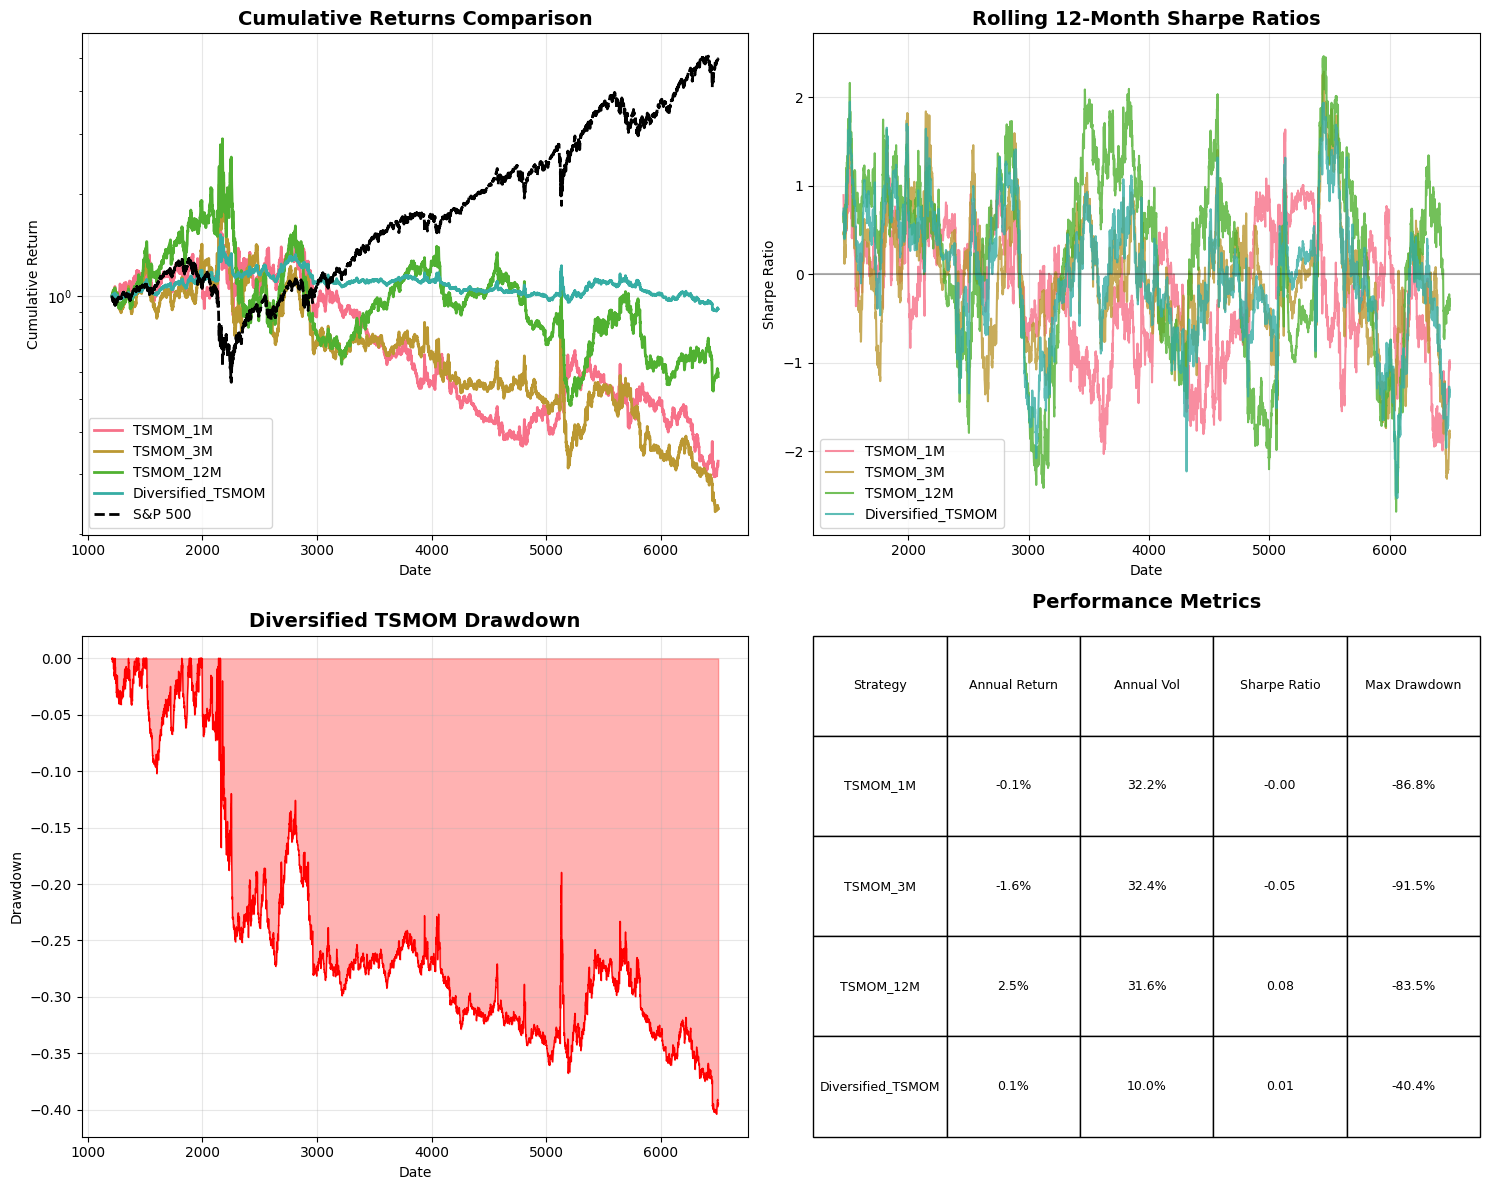


=== Strategy Implementation Complete ===


In [22]:
# Main execution with error handling
if __name__ == "__main__":
    print("=== Time Series Momentum (TSMOM) Strategy Implementation ===")
    print("Based on 'A Century of Evidence on Trend-Following Investing' by Hurst et al.")
    print()

    try:
        prices_df = validate_and_clean_data(prices_df)

        print(f"Data range: {prices_df.index[0]} to {prices_df.index[-1]}")
        print(f"Number of assets: {len(prices_df.columns)}")
        print(f"Assets: {list(prices_df.columns)}")
        print()

        # Initialize and run TSMOM strategy
        tsmom = TSMOMStrategyWithRiskLimits(
            lookback_periods=[1, 3, 12],
            target_vol=0.40,
            portfolio_vol=0.10,
            max_leverage=3.0,
            max_position_pct=0.2,
            max_drawdown=0.5,
            var_limit=1,
            stop_loss_pct=0.5,
            max_correlation=1.00
        )

        print("Running TSMOM strategy...")
        results = tsmom.run_strategy_with_risk_limits(prices_df, risk_free_rate=0.02)

        if results is not None:
            # Display performance metrics
            print("\n=== Performance Summary ===")
            for name, returns in results['individual_strategies'].items():
                metrics = calculate_performance_metrics(returns)
                if metrics:
                    print(f"\n{name}:")
                    print(f"  Annual Return: {metrics.get('Annual Return', 0):.1%}")
                    print(f"  Annual Volatility: {metrics.get('Annual Volatility', 0):.1%}")
                    print(f"  Sharpe Ratio: {metrics.get('Sharpe Ratio', 0):.2f}")
                    print(f"  Max Drawdown: {metrics.get('Max Drawdown', 0):.1%}")

            # Plot results
            print("\nGenerating performance charts...")
            plot_performance_comparison(results, sp500_prices)

            print("\n=== Strategy Implementation Complete ===")
        else:
            print("Strategy execution failed. Please check the data and parameters.")

    except Exception as e:
        print(f"Critical error in main execution: {e}")
        import traceback
        traceback.print_exc()